In [1]:
##Exploring how number of snps decreases as a function of interval length

In [1]:
source("/home/users/mcbitter/OrchardProject/Code/config.R")
source("/home/users/mcbitter/OrchardProject/Code/helper_functions.R")
source("/home/users/mcbitter/OrchardProject/Code/load_packages.R")
source("/home/users/mcbitter/OrchardProject/Code/plotting_functions.R")
source("/home/users/mcbitter/OrchardProject/Code/workflow_functions.R")
source("/home/users/mcbitter/OrchardProject/Code/general_cage_functions.R")
source("/home/users/mcbitter/OrchardProject/Code/Orchard2021_Scripts/LOA/loa.orch2021.functions.R")
setwd('~/dpetrov/MarkB/Orchard2021Data/09_ExpandingPhases/NonLOA/')

In [4]:
setwd('~/dpetrov/MarkB/Orchard2021Data/09_ExpandingPhases/NonLOA/SigSites_ContinuousGLM/')
files = list.files( pattern = 'df.sig')
files



[1] "df.sig.ExpandingPhases.11Weekly.orch21.csv"   
 [2] "df.sig.ExpandingPhases.BiWeekly.orch21.csv"   
 [3] "df.sig.ExpandingPhases.DecWeekly.orch21.csv"  
 [4] "df.sig.ExpandingPhases.EnneaWeekly.orch21.csv"
 [5] "df.sig.ExpandingPhases.HeptWeekly.orch21.csv" 
 [6] "df.sig.ExpandingPhases.HexWeekly.orch21.csv"  
 [7] "df.sig.ExpandingPhases.OctWeekly.orch21.csv"  
 [8] "df.sig.ExpandingPhases.PentaWeekly.orch21.csv"
 [9] "df.sig.ExpandingPhases.TetraWeekly.orch21.csv"
[10] "df.sig.ExpandingPhases.TriWeekly.orch21.csv"  
[11] "df.sig.ExpandingPhases.Weekly.orch21.csv"

In [5]:
data = data.frame()
for (file in files){
    int.length = strsplit(file, '[.]')[[1]][4]
    d = read.csv(file)
    n.comps = length(as.character(unique(d$comparison)))
    res.comp = data.frame()
    for (comp in as.character(unique(d$comparison))){
        d.c = d %>% filter(comparison == comp)
        n.sig = nrow(d.c %>% filter(FDR < 0.05 & abs(afShift > 0.01)))
        res = cbind(int.length, comp, n.sig)
        res.comp = rbind(res.comp, res)
        
    }
    data = rbind(data, res.comp) 
}
data = data %>% mutate(IntervalLength = case_when(
    int.length == '11Weekly' ~ '11 Tpt',
    int.length == 'DecWeekly' ~ '10 Tpt',
    int.length == 'EnneaWeekly' ~ '9 Tpt',
    int.length == 'OctWeekly' ~ '8 Tpt',
    int.length == 'HeptWeekly' ~ '7 Tpt',
    int.length == 'HexWeekly' ~ '6 Tpt',
    int.length == 'PentaWeekly' ~ '5 Tpt',
    int.length == 'TetraWeekly' ~ '4 Tpt',
    int.length == 'TriWeekly' ~ '3 Tpt',
    int.length == 'BiWeekly' ~ '2 Tpt',
    int.length == 'Weekly' ~ '1 Tpt')) 

data = data %>% mutate(n.sig = as.numeric(as.character(n.sig)))

In [6]:
data = data %>% mutate(n.sig = as.numeric(as.character(n.sig)))

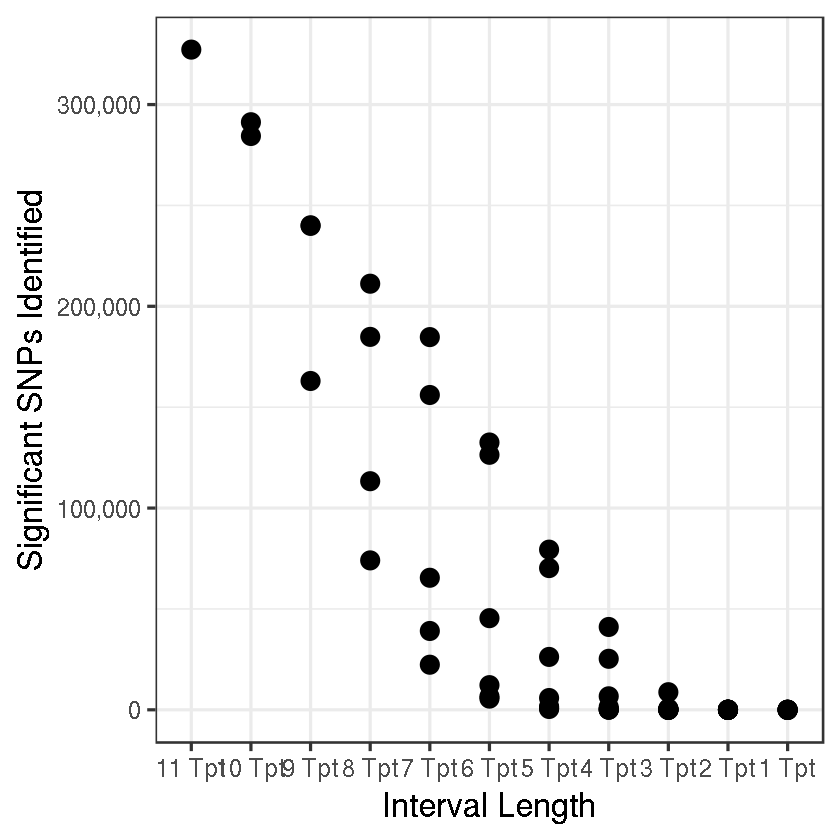

In [15]:
p = ggplot(data, aes(x = IntervalLength, y = n.sig), format(y, scientific = FALSE)) +
    geom_point(size = 5) +
    theme_bw(base_size = 20) +
    xlab("Interval Length") +
    ylab('Significant SNPs Identified') +
    scale_y_continuous(labels = scales::comma)  +
    scale_x_discrete(limits = c('11 Tpt', '10 Tpt', '9 Tpt', '8 Tpt', '7 Tpt', '6 Tpt', '5 Tpt',
                               '4 Tpt', '3 Tpt', '2 Tpt', '1 Tpt'))
p

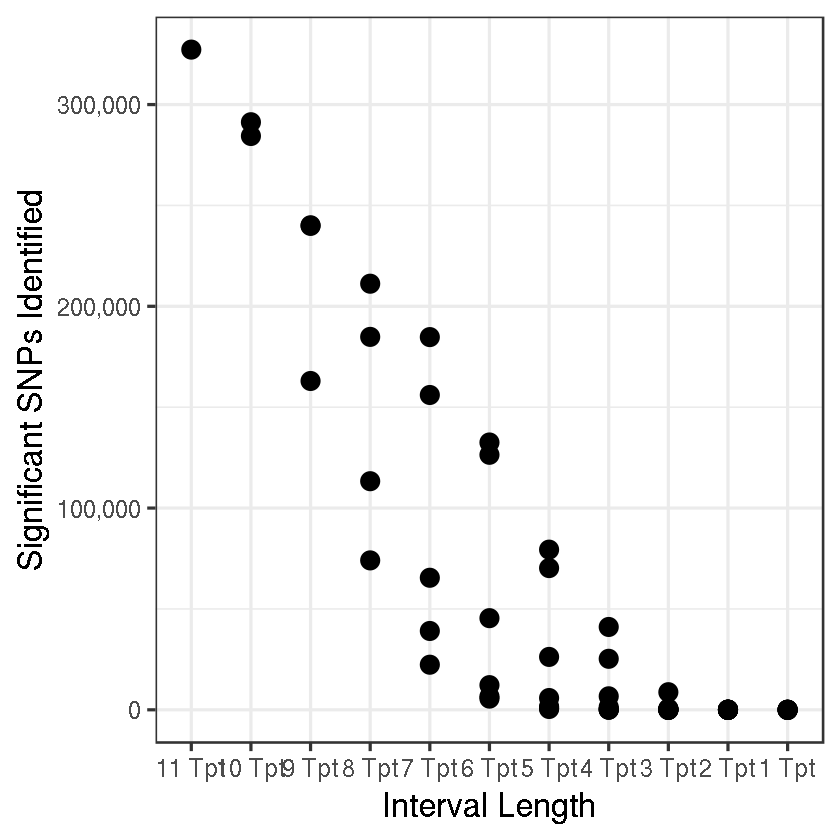

In [16]:
p = ggplot(data, aes(x = IntervalLength, y = n.sig), format(y, scientific = FALSE)) +
    geom_point(size = 5) +
    theme_bw(base_size = 20) +
    xlab("Interval Length") +
    ylab('Significant SNPs Identified') +
    scale_y_continuous(labels = scales::comma)  +
    scale_x_discrete(limits = c('11 Tpt', '10 Tpt', '9 Tpt', '8 Tpt', '7 Tpt', '6 Tpt', '5 Tpt',
                               '4 Tpt', '3 Tpt', '2 Tpt', '1 Tpt'))
p

ggsave('../../../Figures/ExpandingPhases_NonLOA/SigSites.Continuous.pdf', p, height = 10, width = 12)

In [17]:
####same as above, but on discrete glm results
setwd('~/dpetrov/MarkB/Orchard2021Data/09_ExpandingPhases/NonLOA/SigSites_Discrete/')

In [18]:
files = list.files( pattern = 'df.sig')
data = data.frame()
for (file in files){
    int.length = strsplit(file, '[.]')[[1]][4]
    d = read.csv(file)
    n.comps = length(as.character(unique(d$comparison)))
    res.comp = data.frame()
    for (comp in as.character(unique(d$comparison))){
        d.c = d %>% filter(comparison == comp)
        n.sig = nrow(d.c %>% filter(FDR < 0.05 & abs(afShift > 0.01)))
        res = cbind(int.length, comp, n.sig)
        res.comp = rbind(res.comp, res)
        
    }
    data = rbind(data, res.comp) 
}
data = data %>% mutate(IntervalLength = case_when(
    int.length == '11Weekly' ~ '11 Tpt',
    int.length == 'DecWeekly' ~ '10 Tpt',
    int.length == 'EnneaWeekly' ~ '9 Tpt',
    int.length == 'OctWeekly' ~ '8 Tpt',
    int.length == 'HeptWeekly' ~ '7 Tpt',
    int.length == 'HexWeekly' ~ '6 Tpt',
    int.length == 'PentaWeekly' ~ '5 Tpt',
    int.length == 'TetraWeekly' ~ '4 Tpt',
    int.length == 'TriWeekly' ~ '3 Tpt',
    int.length == 'BiWeekly' ~ '2 Tpt',
    int.length == 'Weekly' ~ '1 Tpt')) 

data = data %>% mutate(n.sig = as.numeric(as.character(n.sig)))

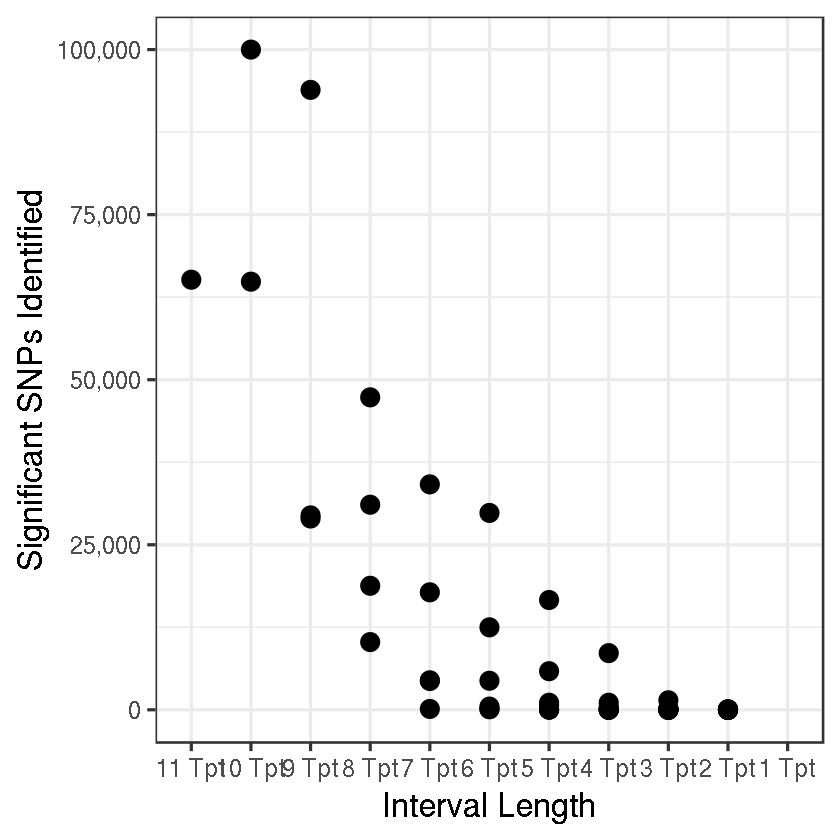

In [20]:
p = ggplot(data, aes(x = IntervalLength, y = n.sig), format(y, scientific = FALSE)) +
    geom_point(size = 5) +
    theme_bw(base_size = 20) +
    xlab("Interval Length") +
    ylab('Significant SNPs Identified') +
    scale_y_continuous(labels = scales::comma)  +
    scale_x_discrete(limits = c('11 Tpt', '10 Tpt', '9 Tpt', '8 Tpt', '7 Tpt', '6 Tpt', '5 Tpt',
                               '4 Tpt', '3 Tpt', '2 Tpt', '1 Tpt'))
p

ggsave('../../../Figures/ExpandingPhases_NonLOA/SigSites.Discrete.pdf', p, height = 10, width = 12)